In [3]:
# importing the necessary packages

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import LabelEncoder


Data Exploration and Cleaning

Given that the files are broken down into 2 folders: Stocks and ETFs, each containing .txt files containing the trading information for each company in each category.
We broke them down into stocks folder and ETF folders

Definition of both Stocks and ETFs:

Stocks represent ownership in a company.
ETFs are investment funds that hold a collection of assets like stocks, bonds, or commodities.
Both are financial instruments that investors can buy, sell, and hold as part of their investment portfolios.
ETFs help analyze stocks by providing broader market or sector trends, offering context on how the overall market or specific industry influences individual stock movements

Combine both ETFs and Stocks into one dataset:
More flexible and efficient, we can conduct analysis of all the data we have
Can simply just filter by their 'asset type' if we want to separate them

In [4]:

def creating_stock_etf_dataset(foldername, asset_type):

    for dirname, _, filenames in os.walk(foldername):
        for filename in filenames:

            # grabbing all the individual stock files
            if filename.endswith('.txt'):

                # getting the company ticker sign from the back of the file name
                company_ticker = filename.rsplit('.', 2)[0].upper()

                file_path = os.path.join(dirname, filename)

                # this section transforms each stock dataset into 
                try:
                    txt_df = pd.read_csv(file_path, delimiter=',')

                    txt_df['symbol'] = company_ticker
                    txt_df['asset_type'] = asset_type
                    market_data.append(txt_df)

                # appends the company .txt files that are empty, so that it gets filtered out from the main dataset
                except pd.errors.EmptyDataError:
                    df_empty.append(company_ticker)


    # returns lst of companies along with their daily trading data
    return market_data, df_empty


# dataset encompassing both stocks and ETFs

market_data = []
df_empty = []

# Pathname to reading the dataset 
stock_folder_path = '../Data/Stocks'
etf_folder_path = '../Data/ETFs'


creating_stock_etf_dataset(stock_folder_path, 'Stocks')
creating_stock_etf_dataset(etf_folder_path, 'ETFs')

# Combining the dataset and separating them into stocks and etf separately
df = pd.concat(market_data, ignore_index=True)



print(f"Size of Data: {len(market_data)}")
print(f".txt that contains no data: {len(df_empty)}")

Size of Data: 8507
.txt that contains no data: 32


In [5]:
# Removed the redundant column OpenInt since it has no useful variation
# OpenInt are not important to ETFs and Stocks, only to derivatives like options and futures

print(df['OpenInt'].unique())
df = df.drop(columns=['OpenInt'])

[0]


In [6]:
# Dataset characteristics

print(f'Number of Rows: {df.shape[0]}')
print(f'Number of Columns: {df.shape[1]}')
print(df.dtypes)


Number of Rows: 17453243
Number of Columns: 8
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
symbol         object
asset_type     object
dtype: object


In [7]:
# Checking for null values
df.isnull().sum()

# Dataset clean :D

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
symbol        0
asset_type    0
dtype: int64

In [8]:
# Label encoding to work with categorical data of asset types

label_encoder = LabelEncoder()
df['asset_type_encoded'] = label_encoder.fit_transform(df['asset_type'])

In [9]:
# First round of cleaning completed 

# Formatting the year
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

df.head(20)

,Date,Open,High,Low,Close,Volume,symbol,asset_type,asset_type_encoded,Year
0,2005-02-25,12.868,12.982,12.834,12.834,15928,IBA,Stocks,1,2005
1,2005-02-28,13.536,13.536,13.273,13.281,16382,IBA,Stocks,1,2005
2,2005-03-01,13.185,13.299,13.185,13.299,1250,IBA,Stocks,1,2005
3,2005-03-02,13.361,13.395,13.273,13.291,8760,IBA,Stocks,1,2005
4,2005-03-03,13.361,13.404,12.966,13.218,9897,IBA,Stocks,1,2005
5,2005-03-04,13.307,13.536,13.228,13.404,11491,IBA,Stocks,1,2005
6,2005-03-07,13.578,13.578,13.273,13.273,6827,IBA,Stocks,1,2005
7,2005-03-08,13.342,13.342,13.228,13.228,2162,IBA,Stocks,1,2005
8,2005-03-09,13.237,13.324,13.237,13.273,6144,IBA,Stocks,1,2005
9,2005-03-10,13.218,13.218,13.203,13.210,6487,IBA,Stocks,1,2005


Data Analysis 

Data collected for number of unique companies and ETFs every year both show that data is unbalanced with data concentration in the time period of 2005 onwards. The data before 2005 is sparse and will introduce bias, potentially skewing our model if the time periods don't represent current market conditions or trends. It will not be relevant for current market conditions.

So we will proceed to clean further by eliminating data in the earlier years.

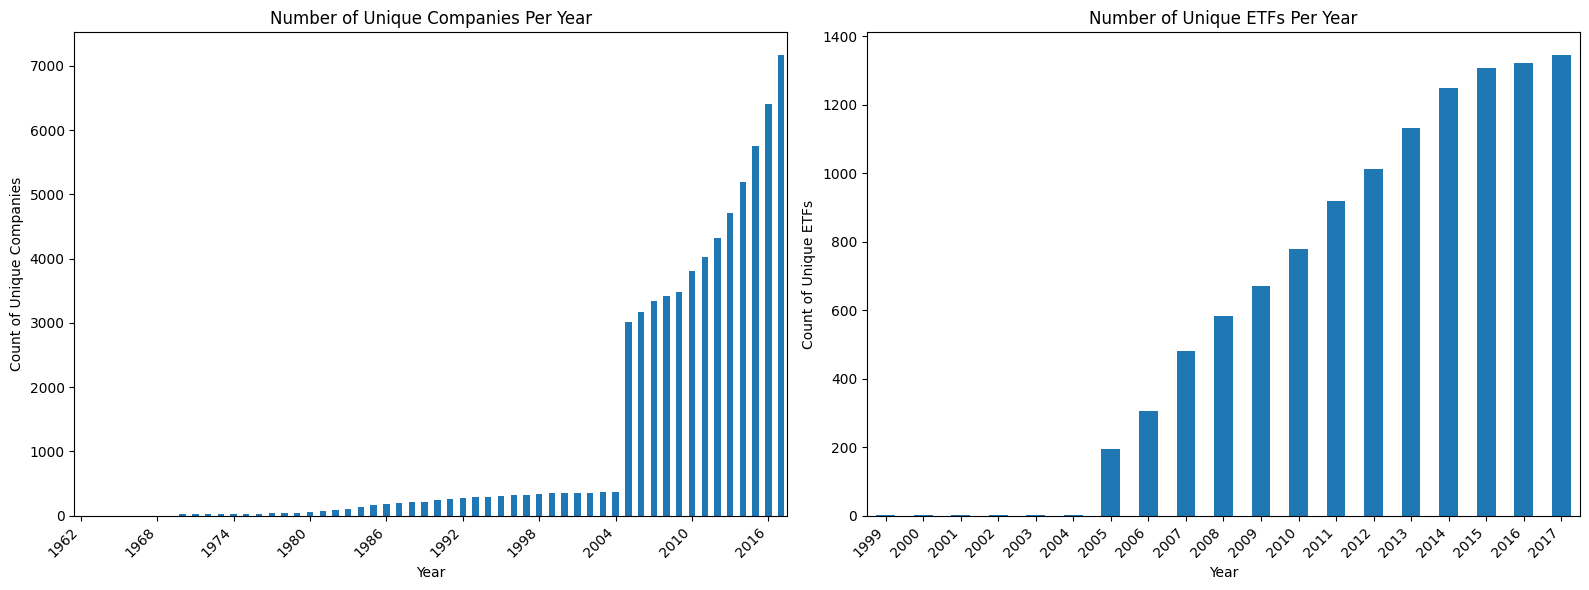

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Graph 1: Number of unique companies per year
stocks = df[df['asset_type_encoded'] == 1]
companies_per_year = stocks.groupby('Year')['symbol'].nunique()
companies_per_year.plot(kind='bar', ax=ax1, title='Number of Unique Companies Per Year')

ax1.xaxis.set_major_locator(MaxNLocator(nbins=len(companies_per_year)//5))
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Unique Companies')

# Graph 2: Number of unique ETFs per year
etf = df[df['asset_type_encoded'] == 0]
etfs_per_year = etf.groupby('Year')['symbol'].nunique()
etfs_per_year.plot(kind='bar', ax=ax2, title='Number of Unique ETFs Per Year')

plt.setp(ax2.get_xticklabels(), rotation=45, ha="right")
ax2.set_xlabel('Year')
ax2.set_ylabel('Count of Unique ETFs')


plt.tight_layout()
plt.show()


We will proceed to filter out the irrelevant data and do feature engineering. Added Features are stated below:

Moving Averages
Calculating the 5-day and 10-day moving averages based on the Close price for each stock/ETF
Help the model detect short-term and medium-term momentum, indicating whether the stock is in an upward or downward trend.

Volatility:
Volatility is calculated as the percentage difference between the High and Low prices for each day.
High volatility often leads to larger price swings, helping the model gauge the likelihood of significant upward or downward moves.

Volume Moving Average:
Calculating the 5-day moving average of the Volume to capture volume trends.
Volume spikes often confirm trends, helping the model strengthen predictions when combined with price changes


In [11]:
# We further clean the data by removing all data before 2005
df = df[df['Date'].dt.year >= 2005]

# Sort the data by symbol and then chronologically so that we can prepare it for feature engineering
df = df.sort_values(by=['symbol', 'Date'])

# Moving average for momentum detection: Rising moving averages generally indicate positive momentum, suggesting the stock is more likely to go up.
df['MA_5'] = df.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=5).mean())
df['MA_10'] = df.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=10).mean())

# Volatility for price fluctuation: A spike in volatility might signal that the stock is about to move significantly, helping the model predict a potential upward or downward move.
df['Volatility'] = (df['High'] - df['Low']) / df['Low'] * 100

# Volume as a Confirmation Signal: Rising volume often accompanies a price move -> increasing volume (strong buyer interest signal price increase), lower volume (less interest, lead to price drops)
df['Volume_MA_5'] = df.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window=5).mean())


# Drop rows with missing values 
df = df.dropna(subset=['MA_5', 'MA_10'])


df.head(20)

,Date,Open,High,Low,Close,Volume,symbol,asset_type,asset_type_encoded,Year,MA_5,MA_10,Volatility,Volume_MA_5
9264618,2005-01-14,14.681,14.946,14.674,14.886,3021753,A,Stocks,1,2005,14.9526,15.2937,1.853619,3592977.6
9264619,2005-01-18,14.791,15.189,14.647,15.142,3733706,A,Stocks,1,2005,14.9294,15.1960,3.700416,3503411.4
9264620,2005-01-19,15.085,15.189,14.865,14.892,3857998,A,Stocks,1,2005,14.9092,15.1158,2.179617,3624796.8
9264621,2005-01-20,14.892,15.231,14.886,15.020,5980250,A,Stocks,1,2005,14.9188,15.0491,2.317614,4024656.0
9264622,2005-01-21,15.020,15.026,14.661,14.715,5475388,A,Stocks,1,2005,14.9310,14.9862,2.489598,4413819.0
9264623,2005-01-24,14.729,14.757,14.467,14.473,5231254,A,Stocks,1,2005,14.8484,14.9005,2.004562,4855719.2
9264624,2005-01-25,14.521,14.851,14.480,14.715,3128858,A,Stocks,1,2005,14.7630,14.8462,2.562155,4734749.6
9264625,2005-01-26,14.791,14.900,14.729,14.851,2813616,A,Stocks,1,2005,14.7548,14.8320,1.160975,4525873.2
9264626,2005-01-27,14.791,15.007,14.647,14.851,2837021,A,Stocks,1,2005,14.7210,14.8199,2.457841,3897227.4
9264627,2005-01-28,14.784,14.886,14.521,14.586,3109151,A,Stocks,1,2005,14.6952,14.8131,2.513601,3423980.0


With the data prepared and ready we can proceed to conduct feature engineering

Short term prediciton:
We will use a classification model
Using this new set of data, we will use it to predict whether a stock price will go up or down the next day
Applicable for Day traders who are short selling or long buying

In [12]:
# we allocate boolean value of 0 if the next day value has a lower close value but 1 if the next day value has a higher close
# This is created for us to predict next day's movement
df['target'] = (df.groupby('symbol')['Close'].shift(-1) > df['Close']).astype(int)


df.head(30)

,Date,Open,High,Low,Close,Volume,symbol,asset_type,asset_type_encoded,Year,MA_5,MA_10,Volatility,Volume_MA_5,target
9264618,2005-01-14,14.681,14.946,14.674,14.886,3021753,A,Stocks,1,2005,14.9526,15.2937,1.853619,3592977.6,1
9264619,2005-01-18,14.791,15.189,14.647,15.142,3733706,A,Stocks,1,2005,14.9294,15.1960,3.700416,3503411.4,0
9264620,2005-01-19,15.085,15.189,14.865,14.892,3857998,A,Stocks,1,2005,14.9092,15.1158,2.179617,3624796.8,1
9264621,2005-01-20,14.892,15.231,14.886,15.020,5980250,A,Stocks,1,2005,14.9188,15.0491,2.317614,4024656.0,0
9264622,2005-01-21,15.020,15.026,14.661,14.715,5475388,A,Stocks,1,2005,14.9310,14.9862,2.489598,4413819.0,0
9264623,2005-01-24,14.729,14.757,14.467,14.473,5231254,A,Stocks,1,2005,14.8484,14.9005,2.004562,4855719.2,1
9264624,2005-01-25,14.521,14.851,14.480,14.715,3128858,A,Stocks,1,2005,14.7630,14.8462,2.562155,4734749.6,1
9264625,2005-01-26,14.791,14.900,14.729,14.851,2813616,A,Stocks,1,2005,14.7548,14.8320,1.160975,4525873.2,0
9264626,2005-01-27,14.791,15.007,14.647,14.851,2837021,A,Stocks,1,2005,14.7210,14.8199,2.457841,3897227.4,0
9264627,2005-01-28,14.784,14.886,14.521,14.586,3109151,A,Stocks,1,2005,14.6952,14.8131,2.513601,3423980.0,1


Splitting and training the data 

This part we will just focus on training stock data and then predicting stock data accordingly

In [13]:
# Filter stocks only
stocks = df[df['asset_type_encoded'] == 1]

# filter out data where open and low values are 0
stocks = stocks[(stocks['Open'] != 0) & (stocks['Low'] != 0)]

stocks = stocks.sort_values(by=['symbol', 'Date'])

# Define split ratio
split_ratio = 0.8

# Function to split each stock into training and testing
def split_group(group):
    split_index = int(len(group) * split_ratio)
    return group.iloc[:split_index], group.iloc[split_index:]

train_data, test_data = zip(*stocks.groupby('symbol', group_keys=False).apply(split_group))


# Concatenate all train and test data into single DataFrames
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)


/var/folders/6b/dfh0f0ns21gdf75k1xqbfbpm0000gn/T/ipykernel_36462/2351888299.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data, test_data = zip(*stocks.groupby('symbol', group_keys=False).apply(split_group))


In [15]:
# Define features and target for training and testing
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'MA_5', 'MA_10', 'Volatility', 'Volume_MA_5']
X_train, y_train = train_data[features], train_data['target']
X_test, y_test = test_data[features], test_data['target']

In [17]:
import numpy as np

# Check for infinity values in X_train and X_test
print("Infinities in X_train:", np.isinf(X_train).values.any())
print("Infinities in X_test:", np.isinf(X_test).values.any())

# Check for NaN values in X_train and X_test
print("NaNs in X_train:", np.isnan(X_train).values.any())
print("NaNs in X_test:", np.isnan(X_test).values.any())




Infinities in X_train: False
Infinities in X_test: False
NaNs in X_train: False
NaNs in X_test: False


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52   1347427
           1       0.50      0.48      0.49   1298106

    accuracy                           0.51   2645533
   macro avg       0.51      0.51      0.51   2645533
weighted avg       0.51      0.51      0.51   2645533



In [ ]:
# Interpolation here 

# TESTING PART 2 